### **Análisis Exploratorio de Datos**

- Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Leemos el archivo

In [2]:
df = pd.read_csv('refugiados_pais_origen.csv')

- Analizamos los primeros y últimos registros.

In [3]:
df.head()

,Año,Pais,Id_Pais,Poblacion_pais_origen
0,2000,Afghanistan,AFG,3587327
1,2001,Afghanistan,AFG,3809763
2,2002,Afghanistan,AFG,2510294
3,2003,Afghanistan,AFG,2136039
4,2004,Afghanistan,AFG,2414460


In [4]:
df.tail()

,Año,Pais,Id_Pais,Poblacion_pais_origen
3768,2016,Zimbabwe,ZWE,18141
3769,2017,Zimbabwe,ZWE,17420
3770,2018,Zimbabwe,ZWE,15618
3771,2019,Zimbabwe,ZWE,10045
3772,2020,Zimbabwe,ZWE,8575


- Rellenamos con 0 si hay valores nulos.

In [5]:
df = df.fillna(0)

- Verificamos la estructura del dataframe.

In [6]:
df.shape

(3773, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    3773 non-null   int64 
 1   Pais                   3773 non-null   object
 2   Id_Pais                3773 non-null   object
 3   Poblacion_pais_origen  3773 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 118.0+ KB


- Realizamos estadísticas descriptivas.

In [8]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Año,Poblacion_pais_origen
count,3773.00,3773.00
mean,2010.12,69831.44
std,6.02,359264.62
min,2000.00,5.00
25%,2005.00,79.00
50%,2010.00,986.00
75%,2015.00,12168.00
max,2020.00,6702910.00


- Filtramos el año 2020 para ver cuales son los 10 paises de origen con mayor cantidad de emigración de refugiados.

In [9]:
año = 2020
top_paises_año = df[df['Año'] == año].sort_values(by=['Poblacion_pais_origen'], ascending=False)

top_paises = top_paises_año.head(10)
top_paises[['Pais', 'Poblacion_pais_origen']]


,Pais,Poblacion_pais_origen
3318,Syria,6702910
20,Afghanistan,2594827
3171,South Sudan,2188785
2360,Myanmar,1103245
930,Democratic Republic of Congo,840392
3120,Somalia,812356
3234,Sudan,787823
655,Central African Republic,642161
1136,Eritrea,524738
544,Burundi,372951


### **Visualizaciones**

- Realizamos gráfico de líneas para ver la distribución en los 10 paises de origen de donde más emigran a lo largo de los años.

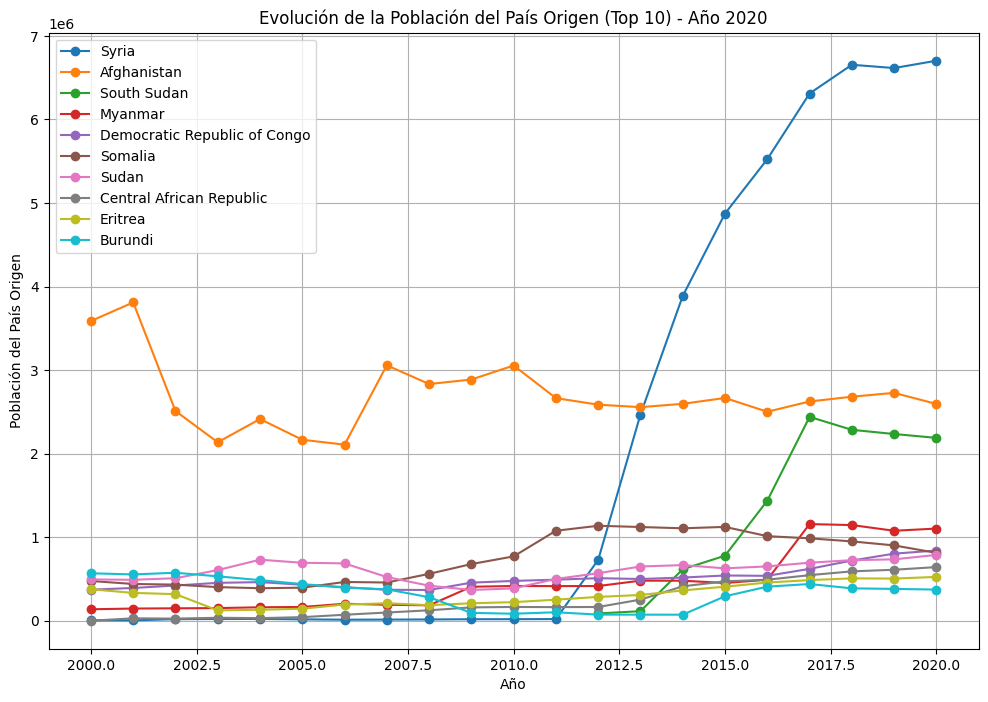

In [11]:
año = 2020

top_paises_año = df[df['Año'] == año].nlargest(10, 'Poblacion_pais_origen')
plt.figure(figsize=(12, 8))

for pais in top_paises_año['Pais']:
    datos_pais = df[(df['Pais'] == pais) & (df['Año'] >= 2000) & (df['Año'] <= año)]
    plt.plot(datos_pais['Año'], datos_pais['Poblacion_pais_origen'], marker='o', label=pais)

plt.xlabel('Año')
plt.ylabel('Población del País Origen')
plt.title(f'Evolución de la Población del País Origen (Top 10) - Año {año}')
plt.legend()
plt.grid(True)

plt.show()


## **Conclusión**

Estos análisis nos brindan una visión impactante de las naciones que experimentan una emigración significativa de sus ciudadanos en busca de refugio en otros países. A lo largo de las décadas, estas naciones han mantenido un flujo constante de personas que huyen de situaciones difíciles y desafiantes, lo que subraya la urgente necesidad de abordar las causas profundas de estas migraciones.